PREDICTING STOCK PRICE USING LSTM AND TENSERFLOW LIBRARIES.
USING A TIME SERIES DATA

LSTM COMES UNDER RECURRENT NEURAL NETWORK.
RNN saves the output of the first prediction and fees it into the next prediction

In [148]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import sequential
from keras.layers import Dense,LSTM

In [149]:
key = "9c61871dd835c534446473a75eff1e9abb1d875f"

In [150]:
df = pdr.get_data_tiingo('AAPL' , api_key = key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [151]:
df.head(5)

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-07-14 00:00:00+00:00  149.04  149.33  147.33  147.97  19961788   
       2017-07-17 00:00:00+00:00  149.56  150.90  148.57  148.82  23243713   
       2017-07-18 00:00:00+00:00  150.08  150.13  148.67  149.20  17713795   
       2017-07-19 00:00:00+00:00  151.02  151.42  149.95  150.48  20615419   
       2017-07-20 00:00:00+00:00  150.34  151.74  150.19  151.50  17053326   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-07-14 00:00:00+00:00  35.266378  35.334999  34.861752  35.013191   
       2017-07-17 00:00:00+00:00  35.389423  35.706498  35.155165  35.214321   
       2017-07-18 00:00:00+00:00  35.512467  35.524298  35.178828  35.304238   
       2017-07-19 00:00:00+00:00  35.734893  35.829543  35.481706  35.607116   
       2017-07-20 00:00:00+00:00  35.573989  35.905262  35.538496  35.848473   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-07-14 00:00:00+00:00   79847152      0.0          1.0  
       2017-07-17 00:00:00+00:00   92974852      0.0          1.0  
       2017-07-18 00:00:00+00:00   70855180      0.0          1.0  
       2017-07-19 00:00:00+00:00   82461676      0.0          1.0  
       2017-07-20 00:00:00+00:00   68213304      0.0          1.0

In [152]:
df.to_csv('AAPL.csv')

In [153]:
df = pd.read_csv('AAPL.csv')

In [154]:
df.tail(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-07-06 00:00:00+00:00,142.92,144.12,141.08,141.355,74064254,142.92,144.12,141.08,141.355,74064254,0.0,1.0
1253,AAPL,2022-07-07 00:00:00+00:00,146.35,146.55,143.28,143.290,66253709,146.35,146.55,143.28,143.290,66253709,0.0,1.0
1254,AAPL,2022-07-08 00:00:00+00:00,147.04,147.55,145.00,145.265,64547798,147.04,147.55,145.00,145.265,64547798,0.0,1.0
1255,AAPL,2022-07-11 00:00:00+00:00,144.87,146.64,143.78,145.670,63305113,144.87,146.64,143.78,145.670,63305113,0.0,1.0
1256,AAPL,2022-07-12 00:00:00+00:00,145.86,148.45,145.05,145.760,77588759,145.86,148.45,145.05,145.760,77588759,0.0,1.0


PREDICTING ON CLOSE FEATURE

In [155]:
dfnew = df.reset_index()['close']

In [156]:
dfnew

0       149.04
1       149.56
2       150.08
3       151.02
4       150.34
         ...  
1252    142.92
1253    146.35
1254    147.04
1255    144.87
1256    145.86
Name: close, Length: 1257, dtype: float64

In [157]:
dfnew.shape

(1257,)

In [158]:
import matplotlib.pyplot as plt

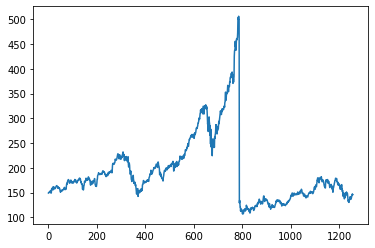

In [159]:
plt.plot(dfnew)

LSTM are veru much sensitive to the scale of the data. so we apply MinMax scaler

In [160]:
scaler = MinMaxScaler(feature_range=(0,1))
dfnew = scaler.fit_transform(np.array(dfnew).reshape(-1,1))

In [161]:
dfnew

array([[0.10569818],
       [0.10700063],
       [0.10830307],
       ...,
       [0.10068879],
       [0.0952536 ],
       [0.09773325]])

VALUES CONVERTED TO THE RANGE OF (0,1)

TIME SERIES DATA IS DIVIDED IN TRAIN AND TEST DATA SET ACCORDING TO THE DATE

In [162]:
training_size = int(len(dfnew)*0.65) 
test_size = len(dfnew) - training_size

dividing the dataset in train and test data.
train data = 65 %
test data = 35 %

In [163]:
train_data,test_data = dfnew[0:training_size,:], dfnew[training_size:len(dfnew),:1]

In [164]:
len(train_data)

817

In [165]:
len(test_data)

440

In [166]:
train_data

array([[1.05698184e-01],
       [1.07000626e-01],
       [1.08303068e-01],
       [1.10657483e-01],
       [1.08954289e-01],
       [1.08778961e-01],
       [1.13337508e-01],
       [1.14965560e-01],
       [1.16768942e-01],
       [1.09505322e-01],
       [1.06850344e-01],
       [1.04921728e-01],
       [1.08227927e-01],
       [1.25986224e-01],
       [1.22053851e-01],
       [1.24107702e-01],
       [1.30169067e-01],
       [1.33350031e-01],
       [1.35804629e-01],
       [1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],


TIMESTEPS - THE NUMBER OF PREVIOUS RESULTS CONSIDER TO PREDICT THE OUTPUT.
FORN EG : IF TIMESTEP IS 3 THIS MEANS MODEL WE SILL THE THE OUTPUT OF PREVIOUS 3 DAYS AND PREDICT THE NEW OUTPUT

NOW CONVERTING AN ARRAY OF VALUES INTO A DATA MATRIX

In [167]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [168]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [169]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [170]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

# reshape input to be [samples, time steps, features] which is required for LSTM

ADDING 1 THAT IS LAST PARAMETER OF RESHAPE() FUNCTION IS USE TO MAKE THE THE MATRIX 3 DIMENSIONAL

In [171]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# STACKED LSTM MODEL

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [173]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))   # 50 signifies the hidden layers
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [174]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 326ms/step - loss: 0.0353 - val_loss: 6.8572e-04
Epoch 2/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0170 - val_loss: 0.0059
Epoch 3/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0129 - val_loss: 0.0034
Epoch 4/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0108 - val_loss: 4.7966e-04
Epoch 5/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0102 - val_loss: 2.8149e-04
Epoch 6/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0088 - val_loss: 2.6618e-04
Epoch 7/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0078 - val_loss: 9.3835e-04
Epoch 8/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0073 - val_loss: 8.9386e-04
Epoch 9/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0067 - val_loss: 0.0013
Epoch 10/100
12/12 [==============================] - 2s 204ms/step

In [176]:
import tensorflow as tf

In [177]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

#transforming bac to non scaler form

In [178]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#RMSE

In [179]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

237.49842069763287

In [180]:
math.sqrt(mean_squared_error(ytest,test_predict))

144.70065198575446

### Plotting 
# shift train predictions for plotting

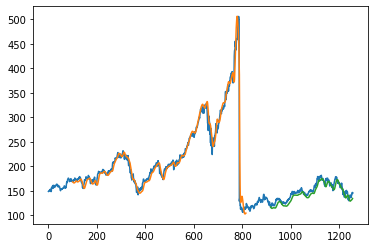

In [185]:
look_back=100
trainpredictplot = np.empty_like(dfnew)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testpredictplot = np.empty_like(dfnew)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(dfnew)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dfnew))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

BLUE - DATASET

ORANGE - PREDICTIONS (TRAIN DATA)


GREEN - OUTPUT (TEST DATA)

In [189]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [190]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [191]:
temp_input

[0.1645835942391985,
 0.15539135879774574,
 0.15143393863494048,
 0.14396994364433308,
 0.13332498434564805,
 0.14001252348152782,
 0.14529743268628675,
 0.14597370068879145,
 0.14116468378209135,
 0.14958046336881647,
 0.1487539135879774,
 0.14108954289292414,
 0.13139636819035688,
 0.1267376330619912,
 0.1405385097056981,
 0.12944270507201,
 0.11994990607388845,
 0.10965560425798371,
 0.12085159674389478,
 0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.1

logic to pass the data of previous 100 days and predicting the output for next 30 days

In [195]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):      # 30 = predicting output for next 30 days
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())     #adding output to input list to maintain the size. so when the next figure is taken that shoud also be taken as a batch of 100 figures 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())        #adding output in output list
    i=i+1

print(lst_output)    

0 day input [ 0.10086412  0.09693175  0.10619912  0.08510958  0.07641828  0.07701941
  0.09084534  0.08395742  0.08435817  0.09252348  0.107201    0.10519724
  0.10487163  0.11113338  0.096531    0.09843456  0.10487163  0.10299311
  0.08966813  0.07586725  0.0627176   0.06492173  0.07160927  0.05815905
  0.06191609  0.07271133  0.07140889  0.0787226   0.08721353  0.08721353
  0.07664371  0.08112711  0.07484033  0.0803757   0.08696306  0.09036944
  0.09896055  0.10068879  0.0952536   0.09773325  0.07539792  0.076602
  0.07636207  0.07509793  0.07320961  0.07097226  0.06854618  0.06601425
  0.06341556  0.06076775  0.05807928  0.0553552   0.05259964  0.04981642
  0.04700917  0.04418121  0.04133543  0.03847441  0.03560038  0.03271535
  0.02982112  0.0269193   0.02401153  0.02109932  0.01818426  0.01526779
  0.01235145  0.00943672  0.00652509  0.00361795  0.00071674 -0.00217729
 -0.00506281 -0.00793857 -0.01080356 -0.01365661 -0.01649679 -0.01932317
 -0.02213488 -0.02493118 -0.02771132 -0.0

In [202]:
day_new=np.arange(1,101)    #data is of 100 days
day_pred=np.arange(101,131)   #prediction is to be done for 30 days

In [197]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)

In [200]:
len(dfnew)


1257

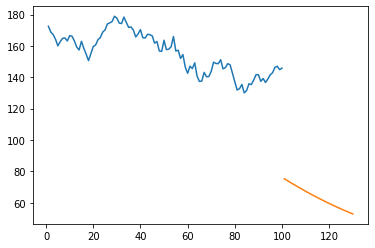

In [204]:
plt.plot(day_new,scaler.inverse_transform(dfnew[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

COMBINED PREDICTION OF 30 DAYS

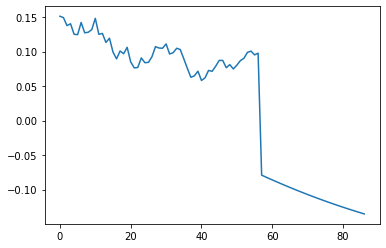

In [211]:
dfnewnew=dfnew.tolist()
dfnewnew.extend(lst_output)
plt.plot(dfnewnew[1200:])

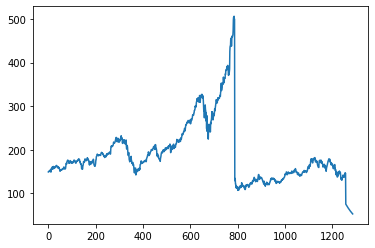

In [213]:
dfnewnew=scaler.inverse_transform(dfnewnew).tolist()
plt.plot(dfnewnew)

#FINAL RESULT OF PREDICTING APPLE STOCK PRICE FOR NEXT 30 DAYS